In [139]:
%pip install shap

You should consider upgrading via the '/Users/petterlauvrak/.pyenv/versions/3.10.4/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor
import shap
pd.set_option('display.max_columns', None)

In [141]:
# load data
df = pd.read_csv('../data/dataset.csv')
df = df.sort_values(by=['Season', 'Player_id'])
categorical_features = ['Club_id', 'Competition', 'Liga', 'Liga_level', 'international']
df[categorical_features] = df[categorical_features].astype('category')
# and drop the name column (becasue it cant handle strings that are not categorical)


In [142]:
df = df.drop(columns=['name'])
df = df.query('MarketValue > 0.1')

# load model
model = CatBoostRegressor()
model.load_model('model/catboost_model_test22.cbm')

In [143]:
test = df[df['Season'] == 2022]
x_test = test.drop(['MarketValue'], axis=1)
y_test = test['MarketValue']

In [144]:
test

,Player_id,Season,Games,PPG,Goals,Assists,Yellow_cards,Yellow_red_cards,Red_cards,Penalty_goals,Minutes_per_goal,Minutes_played,Club_id,Competition,MarketValue,age,Days_injured,international,Liga,Liga_level,W,D,L,Points,Goales_scored,Goales_conceded
1125,215,2022,43,1.70,14,4,2,0,0,0,206.0,3086,9875,Primera División Clausura,250000,41.0,0.0,1,Primera División Apertura,First Tier,5,1,0,16,9,3
7857,2138,2022,17,0.97,0,0,5,0,1,0,0.0,561,2741,1.Division,25000,39.0,0.0,1,1.Division,Second Tier,13,8,1,47,43,21
11352,3159,2022,28,2.42,2,0,12,0,0,0,532.0,2249,332,Serie B,100000,39.0,6.0,0,Serie B,Second Tier,13,11,5,50,45,27
14352,3333,2022,30,1.68,0,2,2,0,0,0,0.0,1001,31,Premier League,2000000,36.0,33.0,1,Premier League,First Tier,12,6,8,42,47,29
15508,3455,2022,2,1.50,0,0,0,0,0,0,0.0,40,5,Serie A,2000000,41.0,263.0,1,Serie A,First Tier,14,5,6,47,42,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176799,1046796,2022,9,0.19,1,1,0,0,0,0,254.0,552,20299,Jack’s League,25000,18.0,0.0,0,Jack’s League,Third Tier,5,3,17,18,29,58
136404,1050249,2022,4,0.00,0,0,0,0,0,0,0.0,136,3592,Premier Liga,100000,19.0,0.0,0,Premier Liga,First Tier,6,3,8,21,12,19
147674,1050852,2022,7,1.84,0,0,2,0,0,0,0.0,584,48726,Premier Liga,50000,18.0,0.0,1,Premier Liga,First Tier,4,5,7,17,19,24
116736,1056907,2022,4,0.22,0,0,1,0,0,0,0.0,92,2995,Liga Portugal,100000,17.0,0.0,0,Liga Portugal,First Tier,4,3,17,15,18,42


In [145]:
# test.loc[test['Player_id'] == 68290]
test = test.reset_index()


In [146]:
test.index[test['Player_id'] == 241641].tolist()


[4986]

In [147]:

x_test.iloc[2242]



Player_id               122153
Season                    2022
Games                        2
PPG                        1.5
Goals                        0
Assists                      0
Yellow_cards                 0
Yellow_red_cards             0
Red_cards                    0
Penalty_goals                0
Minutes_per_goal           0.0
Minutes_played              35
Club_id                    506
Competition            Serie A
age                       29.0
Days_injured             296.0
international                1
Liga                   Serie A
Liga_level          First Tier
W                           16
D                            5
L                            5
Points                      38
Goales_scored               44
Goales_conceded             22
Name: 111187, dtype: object

In [148]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


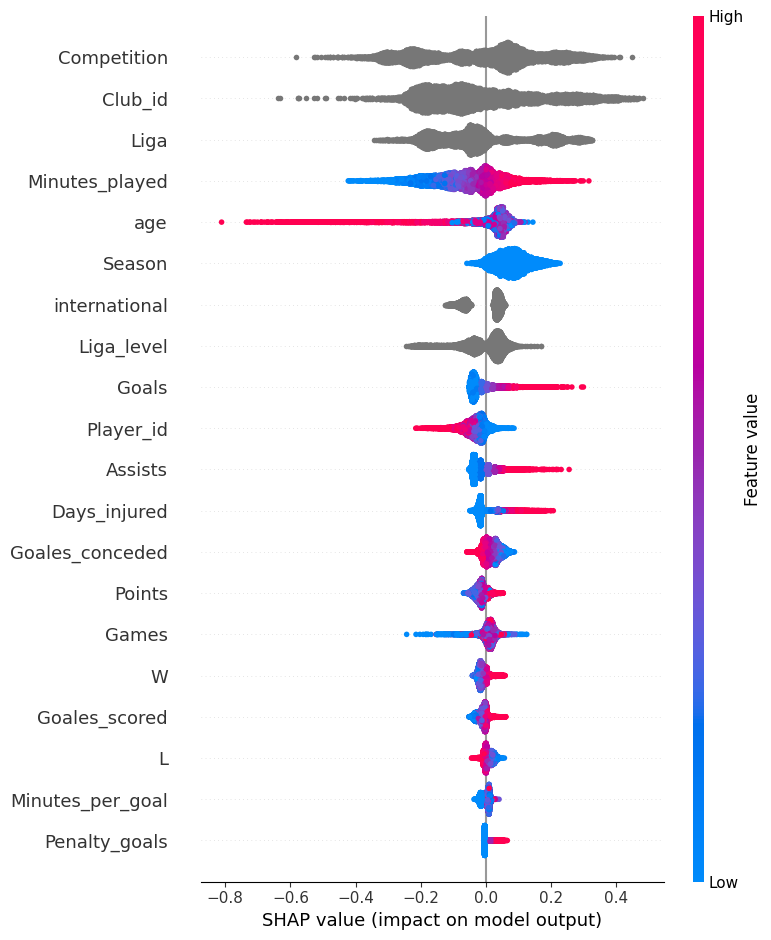

In [149]:
shap.summary_plot(shap_values, x_test)

In [150]:
test_model = model.predict(x_test)
test_model = 10**test_model -1

In [151]:
test_model[4986]

29235537.280030787

In [152]:
# shap_values = (10**shap_values) -1

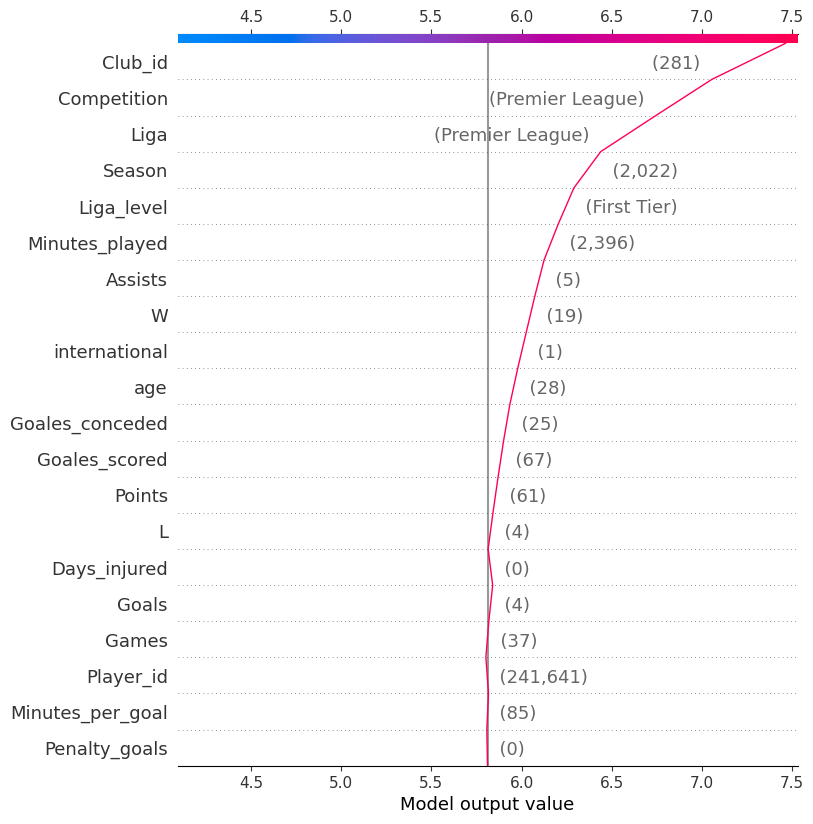

In [153]:
shap.decision_plot(explainer.expected_value, shap_values[4986], x_test.iloc[4986])

In [74]:
shap.initjs()

In [80]:
shap.force_plot(explainer.expected_value, shap_values[4986], x_test.iloc[4986])